In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ls

In [3]:
df       = pd.read_csv('imageMNIST.csv', header = None).T
df_label = pd.read_csv('labelMNIST.csv', header=None)

corrects = pd.read_csv('../exercicio_2/results/analysis/corrects.csv', index_col=0)
classification = pd.read_csv('../exercicio_2/results/analysis/classification.csv', index_col=0)

df.columns     = ['image_'+str(i) for i in range(df_label.shape[0])]
df_label.index = df.columns


In [4]:
# image = pd.DataFrame( np.array( df[0] ).reshape((20,20)) )
# image

In [5]:
# plt.plot(image)

In [6]:
df

,image_0,image_1,image_2,image_3,image_4,image_5,image_6,image_7,image_8,image_9,...,image_4990,image_4991,image_4992,image_4993,image_4994,image_4995,image_4996,image_4997,image_4998,image_4999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
def gen_image(data, label, bit=8):
    
    image_number = data.columns[0]
    name = label.loc[image_number][0]
    # print(name)
    
    data = np.array( data ) 
    
    two_d = (np.reshape(data, (20, 20)) * (2**bit - 1)).T
    plt.imshow(two_d, interpolation='nearest', cmap='gray')
    plt.title(name)
    
    return plt

<module 'matplotlib.pyplot' from 'C:\\.Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

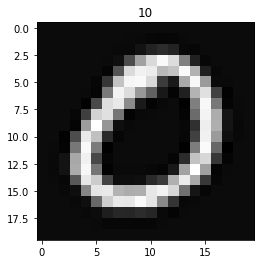

In [48]:
gen_image(   df.sample(1, axis=1)  ,  df_label   )

In [9]:
categories = pd.concat([classification, corrects, df_label.loc[classification.index]], axis=1)
categories.columns = ['result_label', 'correct', 'orig_label']
categories

,result_label,correct,orig_label
image_0,10,1,10
image_1,10,1,10
image_10,10,1,10
image_100,10,1,10
image_1000,2,1,2
...,...,...,...
image_995,1,1,1
image_996,1,1,1
image_997,1,1,1
image_998,1,1,1


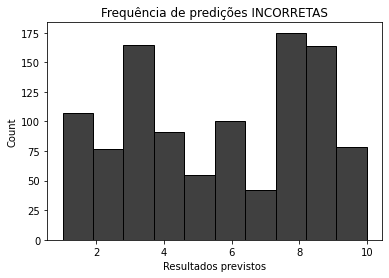

In [14]:
sns.histplot(   categories.query('correct == 0')['result_label'], bins=10, color='black'   )
plt.title('Frequência de predições INCORRETAS')
plt.xlabel('Resultados previstos')
plt.show()

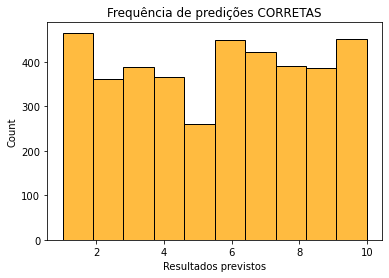

In [15]:
sns.histplot(   categories.query('correct == 1')['result_label'], bins=10, color='orange'   )
plt.title('Frequência de predições CORRETAS')
plt.xlabel('Resultados previstos')
plt.show()

Text(0.5, 0, 'Resultados previstos')

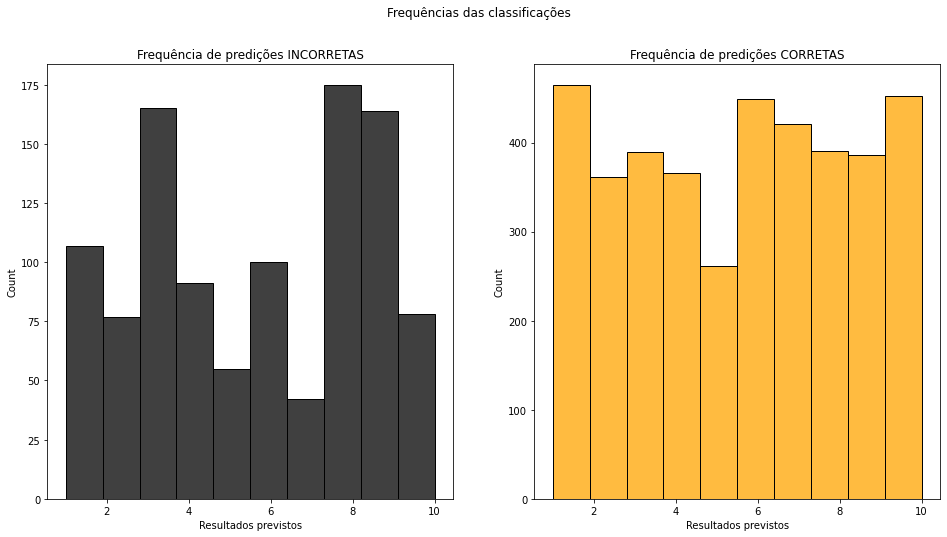

In [20]:
fig, ax = plt.subplots(1,2,figsize=(16,8))

plt.suptitle('Frequências das classificações')

sns.histplot(   categories.query('correct == 1')['result_label'], bins=10, color='orange', ax=ax[1]   )
ax[1].set_title('Frequência de predições CORRETAS')
ax[1].set_xlabel('Resultados previstos')

sns.histplot(   categories.query('correct == 0')['result_label'], bins=10, color='black', ax=ax[0]   )
ax[0].set_title('Frequência de predições INCORRETAS')
ax[0].set_xlabel('Resultados previstos')

In [28]:
bad = categories.query('correct == 0')['result_label']

In [31]:
bad_sample = bad.sample(4)

df[bad_sample.index[0]]

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
395    0.0
396    0.0
397    0.0
398    0.0
399    0.0
Name: image_2458, Length: 400, dtype: float64

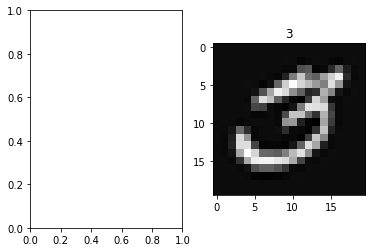

In [81]:
bad_sample = bad.sample(4)

fig, ax = plt.subplots(1, 2)

ax[0] = gen_image( pd.DataFrame(df[bad_sample.index[0]]), df_label)
ax[1] = gen_image( pd.DataFrame(df[bad_sample.index[1]]), df_label)


<AxesSubplot:xlabel='result_label', ylabel='Count'>

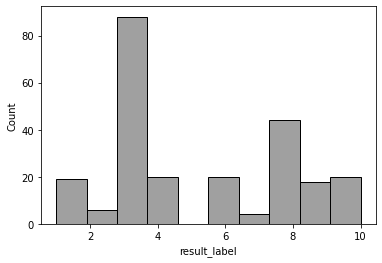

In [66]:
sns.histplot( categories.query('orig_label == 5 and correct == 0')['result_label'], bins=10, color='gray' )

<AxesSubplot:xlabel='result_label', ylabel='Count'>

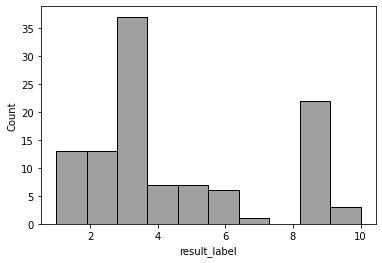

In [69]:
sns.histplot( categories.query('orig_label == 8 and correct == 0')['result_label'], bins=10, color='gray' )

<AxesSubplot:xlabel='result_label', ylabel='Count'>

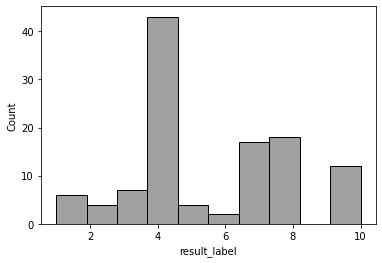

In [70]:
sns.histplot( categories.query('orig_label == 9 and correct == 0')['result_label'], bins=10, color='gray' )

<AxesSubplot:xlabel='result_label', ylabel='Count'>

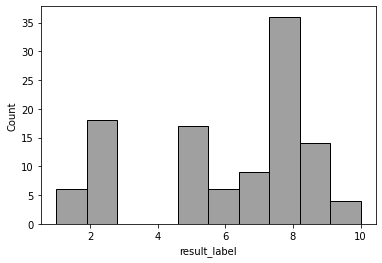

In [71]:
sns.histplot( categories.query('orig_label == 3 and correct == 0')['result_label'], bins=10, color='gray' )

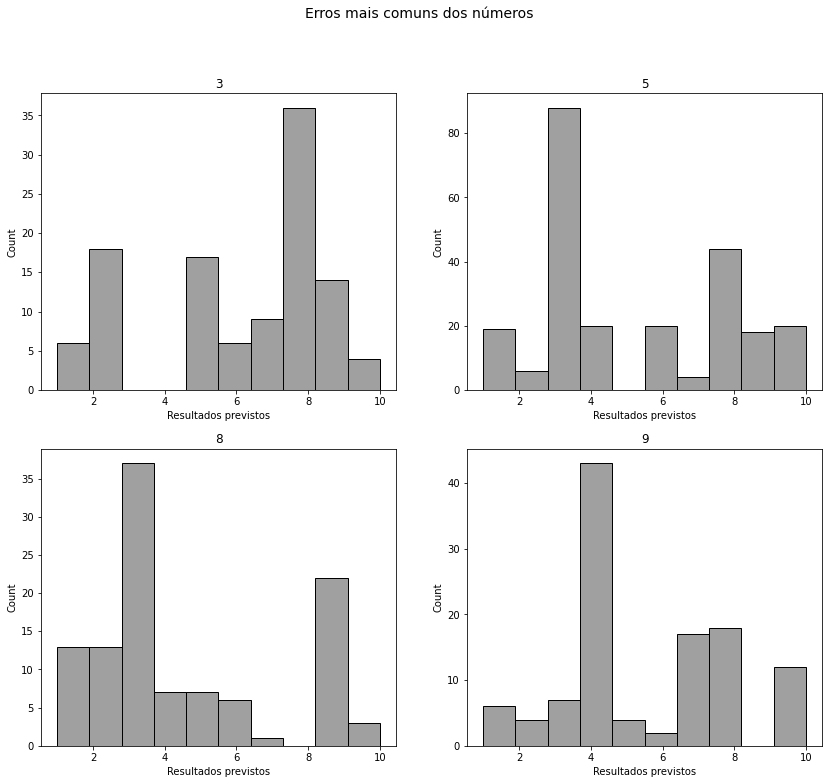

In [89]:
fig, ax = plt.subplots(2, 2, figsize=(14,12))

plt.suptitle('Erros mais comuns dos números', fontsize=14)

sns.histplot( categories.query('orig_label == 3 and correct == 0')['result_label'], bins=10, color='gray', ax=ax[0,0] )
ax[0,0].set_title('3')
ax[0,0].set_xlabel('Resultados previstos')

sns.histplot( categories.query('orig_label == 5 and correct == 0')['result_label'], bins=10, color='gray', ax=ax[0,1] )
ax[0,1].set_title('5')
ax[0,1].set_xlabel('Resultados previstos')

sns.histplot( categories.query('orig_label == 8 and correct == 0')['result_label'], bins=10, color='gray', ax=ax[1,0] )
ax[1,0].set_title('8')
ax[1,0].set_xlabel('Resultados previstos')

sns.histplot( categories.query('orig_label == 9 and correct == 0')['result_label'], bins=10, color='gray', ax=ax[1,1] )
ax[1,1].set_title('9')
ax[1,1].set_xlabel('Resultados previstos')

plt.show()